# Laptop price prediction

Problem statement:
The aim of this project is to predict the price of a laptop based on its hardware specifications such as brand, processor speed, RAM size, storage capacity, screen size, and weight.
By training regression models on historical laptop data, we can estimate laptop prices accurately for new configurations.



In [27]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


Data load

In [18]:
import pandas as pd

df = pd.read_csv("laptop_price.csv")


Data understanding

In [21]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [22]:
df.tail()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459
999,Lenovo,1.711980,4,256,16.561498,3.440883,8807.696702


In [28]:
df.shape

(1000, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [30]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


Data preprocessing

check null values

In [31]:
df.isnull().sum()


Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

Check duplicate values

In [32]:
df.duplicated().sum()


np.int64(0)

Remove unneccessary columns

In [33]:
df.drop(columns=['laptop_name'], inplace=True, errors='ignore')
df.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

Data type conversion

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


Feature engineering

In [35]:
from sklearn.preprocessing import LabelEncoder

df.columns = df.columns.str.strip().str.lower()
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])




Feature selection

In [36]:
df.columns = df.columns.str.strip().str.lower()
X = df.drop('price', axis=1)   # input features
y = df['price']               # output (target)
df.describe()


,brand,processor_speed,ram_size,storage_capacity,screen_size,weight,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.956000,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,1.404292,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,0.000000,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,1.000000,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.000000,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.000000,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,4.000000,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


Feature scaling

strandadization

In [37]:
X = df.drop('price', axis=1)
y = df['price']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Before Scaling:")
print(X.head())

print("\nAfter Scaling:")
print(X_scaled_df.head())



Before Scaling:
   brand  processor_speed  ram_size  storage_capacity  screen_size    weight
0      1         3.830296        16               512    11.185147  2.641094
1      0         2.912833         4              1000    11.311372  3.260012
2      4         3.241627         4               256    11.853023  2.029061
3      0         3.806248        16               512    12.280360  4.573865
4      0         3.268097        32              1000    14.990877  4.193472

After Scaling:
      brand  processor_speed  ram_size  storage_capacity  screen_size  \
0 -0.681111         1.476128  0.045524         -0.231664    -1.684219   
1 -1.393570         0.221788 -1.047057          1.326040    -1.610189   
2  1.456266         0.671310 -1.047057         -1.048819    -1.292510   
3 -1.393570         1.443251  0.045524         -0.231664    -1.041877   
4 -1.393570         0.707499  1.502299          1.326040     0.547843   

     weight  
0 -0.953490  
1 -0.238893  
2 -1.660138  
3  1.278069

In [38]:
X_scaled_df.describe()


,brand,processor_speed,ram_size,storage_capacity,screen_size,weight
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.552714e-18,-2.442491e-16,7.105427e-18,-4.618528e-17,9.254819e-16,-2.486900e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.393570e+00,-1.693983e+00,-1.047057e+00,-1.048819e+00,-1.785705e+00,-1.693045e+00
25%,-6.811107e-01,-9.042076e-01,-6.828630e-01,-1.048819e+00,-8.335734e-01,-8.656063e-01
50%,3.134819e-02,1.404672e-02,4.552420e-02,-2.316637e-01,2.513354e-02,-2.643021e-03
75%,7.438071e-01,8.367163e-01,1.502299e+00,1.326040e+00,8.632112e-01,8.609356e-01
max,1.456266e+00,1.706141e+00,1.502299e+00,1.326040e+00,1.717829e+00,1.759374e+00


Splitting data

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Model selection

Linear regression


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Results:
R2 Score: 0.9996478987127725
MAE: 145.27235007959555
RMSE: 178.80039840523037


In [1]:
code = """from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
"""

# Save to a Python file
with open("linear_regression_model.py", "w") as file:
    file.write(code)

print("✅ Code saved successfully as 'linear_regression_model.py'")


✅ Code saved successfully as 'linear_regression_model.py'


Support vector regression

In [41]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("Support Vector Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))


Support Vector Regression Results:
R2 Score: -0.04009055629944602
MAE: 7925.300530180735
RMSE: 9717.851367514399


In [2]:
code = """from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("Support Vector Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
"""

# Save to a Python file
with open("svr_model.py", "w") as file:
    file.write(code)

print("✅ Code saved successfully as 'svr_model.py'")


✅ Code saved successfully as 'svr_model.py'


Decision tree regression

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree Regression Results:
R2 Score: 0.999172535065274
MAE: 219.17223765661288
RMSE: 274.10027748231346


In [4]:
code = """from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
"""

# Save to a Python file
with open("decision_tree_model.py", "w") as file:
    file.write(code)

print("✅ Code saved successfully as 'decision_tree_model.py'")


✅ Code saved successfully as 'decision_tree_model.py'


Random forest regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regression Results:
R2 Score: 0.9995435168521418
MAE: 167.7472471139204
RMSE: 203.5855972268638


In [7]:
code = """from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
"""

# Save to a Python file
with open("random_forest_model.py", "w") as file:
    file.write(code)

print("✅ Code saved successfully as 'random_forest_model.py'")


✅ Code saved successfully as 'random_forest_model.py'


polynomial regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print("Polynomial Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial Regression Results:
R2 Score: 0.9996346558939885
MAE: 148.35199395830162
RMSE: 182.13177850247712


In [9]:
data = """from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print("Polynomial Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
"""

# Save to a Python file
with open("polynomial_regression_model.py", "w") as file:
    file.write(data)

print("✅ Code saved successfully as 'polynomial_regression_model.py'")


✅ Code saved successfully as 'polynomial_regression_model.py'


Model prediction and Evaluation

In [45]:
# Import required libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use Random Forest model for final prediction
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Random Forest Regression Results:")
print("R² Score:", round(r2, 3))
print("MAE:", round(mae, 3))
print("RMSE:", round(rmse, 3))

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print("\nSample Predictions:")
print(comparison)


📊 Random Forest Regression Results:
R² Score: 1.0
MAE: 167.747
RMSE: 203.586

Sample Predictions:
         Actual     Predicted
0  10900.502075  10559.450079
1  31727.516697  31453.240559
2   9636.022750   9673.533141
3   9412.599857   9229.840415
4  31641.105861  32005.136029
5  31832.486943  31558.069688
6  10438.451568  10632.731266
7  17205.205679  16863.126870
8  18743.569392  18568.723476
9  32342.705862  32347.309998


Accuracy vs Visualization

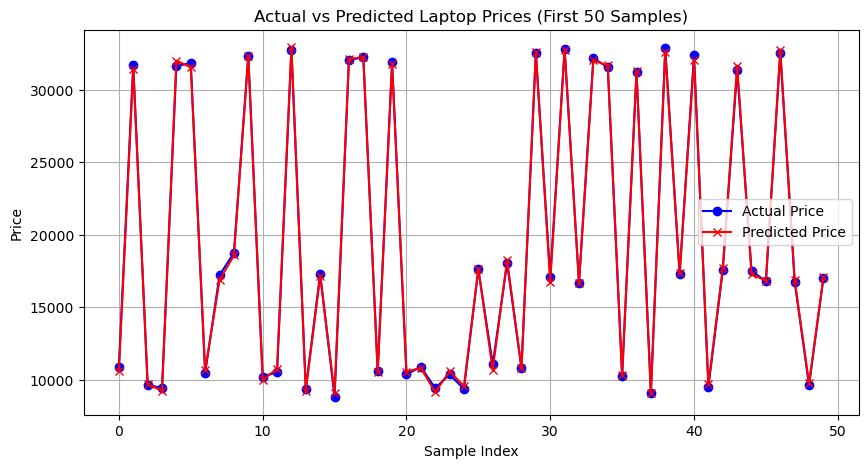

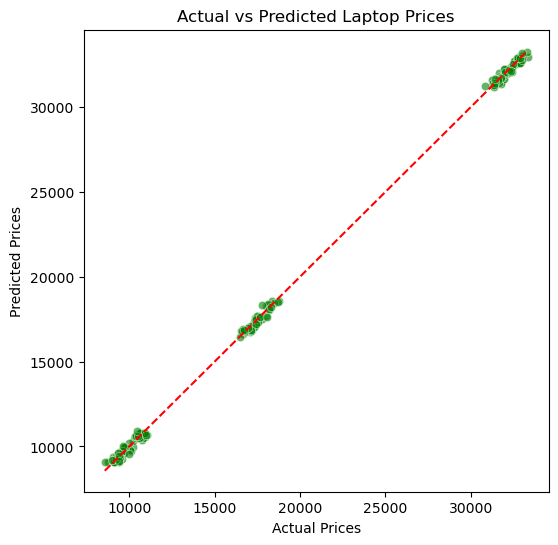

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Line Plot: Actual vs Predicted ---
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Actual Price', color='blue', marker='o')
plt.plot(y_pred[:50], label='Predicted Price', color='red', marker='x')
plt.title('Actual vs Predicted Laptop Prices (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# --- 2️⃣ Scatter Plot: Prediction Accuracy ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Laptop Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Save model 

In [47]:
import joblib

# Save your trained Random Forest model
joblib.dump(rf, 'laptop_price_model.pkl')

# Save the StandardScaler used for input features
joblib.dump(scaler, 'laptop_price_scaler.pkl')

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!
